# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [15]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
# Only print some decimal places


# System functionality
import sys
sys.path.append('..')

from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr as corr_coeff

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import sklearn
import operator

%precision 3

'%.3f'

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [16]:
auto_numeric = pd.read_csv('datasets/train_auto_numeric.csv')

print('Number of data points: ' + str(auto_numeric.shape[0]))
print('Number of attributes (including price): ' + str(auto_numeric.shape[1]) )

display(auto_numeric.describe())

display(auto_numeric.head(10))

Number of data points: 159
Number of attributes (including price): 16


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0
8,121.0,88.4,141.1,60.3,53.2,3.39,3.03,3.03,9.5,48000.0,5300.0,47.0,53.0,59.33,25.08,5151.0
9,98.0,104.3,155.9,68.3,52.0,6.05,3.31,3.47,7.8,70000.0,5000.0,34.0,34.0,51.55,36.35,6295.0


(2) This dataset has 159 data points with 16 attributes (including price). Each attribute is a continuous real number but some are integers. There are no ordinal or categorical attributes.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

engine-size     :0.7151
width           :0.5243
length          :0.5129
engine-power    :0.4440
highway-mpg     :0.4385


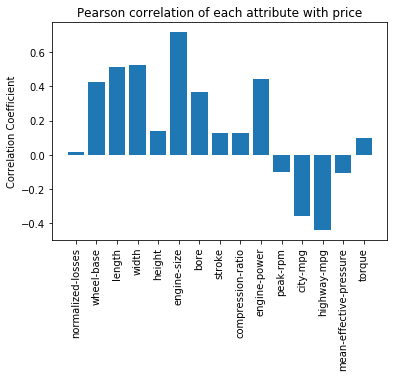

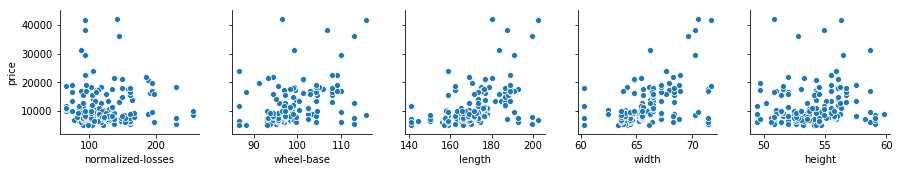

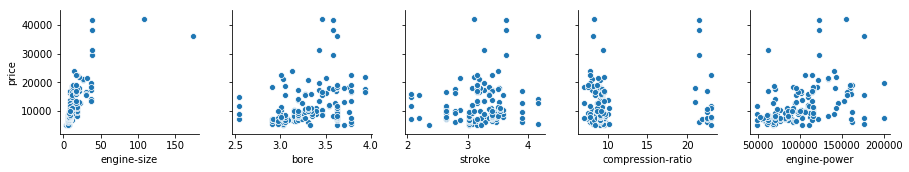

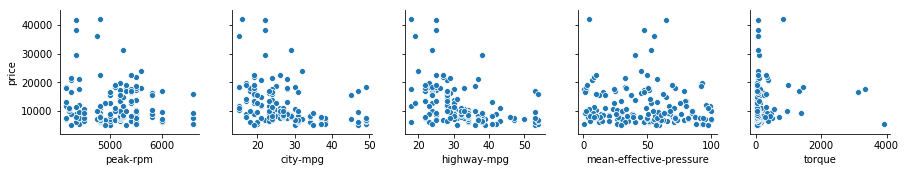

In [17]:
##################### A #####################
# A dict of the correlation coefficients
corr_coeffs = {}

# A dict of the absolute value of the correlation coefficients
abs_coeffs = {}

for column in auto_numeric.drop(columns='price'): 
    corr_coeffs[column] = corr_coeff(auto_numeric[column],auto_numeric['price'])[0]
    abs_coeffs[column] = abs(corr_coeffs[column])

# Order the coeffs
sorted_coeffs = sorted(abs_coeffs.items(), key=operator.itemgetter(1))

# Print the 5 largest
for i in range(1,6):
    attrib = sorted_coeffs[-i][0]
    value = sorted_coeffs[-i][1]
    max_length = 15
    print(attrib +(max_length-len(attrib))*' ' + " :{0:.4f}".format(value))

# Create a bar chart with each correlation coefficient
plt.bar(range(len(corr_coeffs)), list(corr_coeffs.values()),tick_label=list(corr_coeffs.keys()))
plt.xticks(rotation='vertical')
plt.ylabel('Correlation Coefficient')
plt.title('Pearson correlation of each attribute with price')

##################### B #####################
# Plot three rows of pairplots showing the price along the y-axis in each
sns.pairplot(auto_numeric,
             x_vars=['normalized-losses','wheel-base','length','width','height'],
             y_vars='price')
sns.pairplot(auto_numeric,
             x_vars=['engine-size','bore','stroke','compression-ratio','engine-power'],
             y_vars='price')
sns.pairplot(auto_numeric,
             x_vars=['peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque'],
             y_vars='price')
plt.show()

(2) The attributes with the highest correlation coefficients are good candidates for being useful price predictors as movement in the indpendent variable is likely to have an effect on the dependent. The five highest most correlated attributes by magnitude are:

`'engine-size','width', 'length', 'engine-power', 'highway-mpg' `

Note that highway-mpg is the only attribute that is highly negatively correlated. The correlation coefficient is a useful tool compared to looking at a plot as we can order it simply rather than trying to interpret many plots. These correlation coefficients were determined via an ordered dictionary in the cell above, but could also be read off from the bar chart.

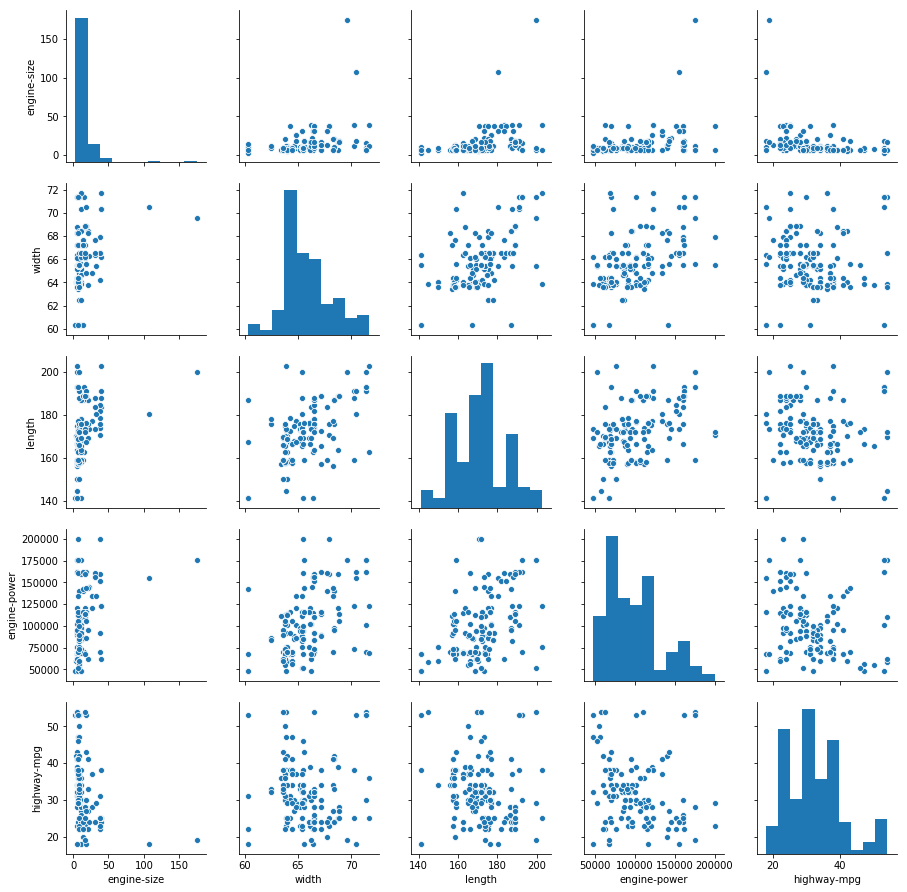

In [18]:
sns.pairplot(auto_numeric,vars=['engine-size', 'width', 'length', 'engine-power' ,'highway-mpg'])
plt.show()

(4) Yes, some attributes do. For example: 'engine-power' and 'length', 'length' and 'width' or 'engine-power' and 'highway-mpg'

(5) Attributes to remove would be ones that look to be highly un-correlated with 'price' and so are not useful information for our model. The attributes with the lowest correlation coefficients were 'normalized-losses' and 'torque'

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

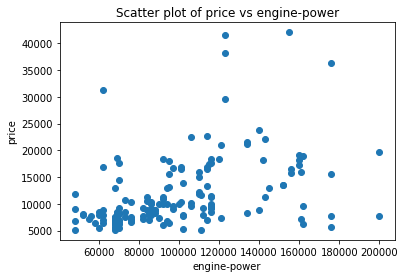

In [19]:
plt.scatter(auto_numeric['engine-power'],auto_numeric['price'])
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Scatter plot of price vs engine-power')
plt.show()

(2) There is a correlation between engine-power and price, but not a firm rule. There are cases where large differences in engine-power reflect no difference in price and vice-versa. So I would say that this will be a somewhat useful variable for price prediction. 

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

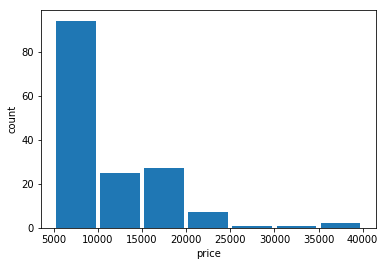

In [20]:
bins = list(range(5000,45000,5000))
plt.hist(auto_numeric['price'],bins=bins, rwidth=0.9)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

(2) The price may not be easily modelled because it is not normally distributed however this is not a hard and fast conclusion. Li etal[1] suggest that simply checking the histogram of the dependent variable is not sufficient to say whether the problem can be modelled with linear regression. They say 'it is more accurate to check that the errors of a linear regression model are distributed normally or the dependent variable has a conditional normal distribution'. So as long as our *residuals* are normally distributed, then we're good to go.

They further note that  '(for a) large sample, the use of a linear regression technique(s), even if the dependent variable violates the “normality assumption” rule, remains valid.'

However, they further comment that an appropriate sample size is on the order of 3000, of which our 159 data points does not come close to.

If we *did* want to make the price data normally distributed, we could pre-process it with a radial basis function.

[1]-Xiang Li, Wanling Wong, Ecosse L. Lamoureux, Tien Y Wong; Are Linear Regression Techniques Appropriate for Analysis When the Dependent (Outcome) Variable Is Not Normally Distributed?. Invest. Ophthalmol. Vis. Sci. 2012;53(6):3082-3083. doi: 10.1167/iovs.12-9967.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [31]:
X_pre_split = np.array(auto_numeric['engine-power']).reshape(-1,1)
y_pre_split = np.array(auto_numeric['price'])

X_train, X_test, y_train, y_test = train_test_split(X_pre_split, y_pre_split, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [32]:
# Literally just the mean of the data
baseline = np.mean(auto_numeric['price'])
print("Baseline param: {0:.4f}".format(baseline))

Baseline param: 11684.7233


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)
intercept = lr.intercept_
print("Gradient: {0:.4f}".format(lr.coef_[0]))
print("Intercept: {0:.4f}".format(intercept))

Gradient: 0.0899
Intercept: 2823.1219


(2) One can't really say what impact this value has on the 'engine-power' attribute to predict 'price'. All we can really say is that a positive value implies that the model believes there to be a positive correlation between 'engine-power' and 'price'. 

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

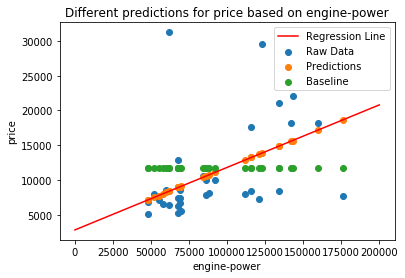

In [34]:
# Get the predicted points from the linear model
y_predict_test = lr.predict(X_test)

# Get the baseline points
y_baseline = [baseline]*len(X_test)

plt.scatter(X_test, y_test, label='Raw Data')
plt.scatter(X_test, y_predict_test,label='Predictions')
plt.plot([0, 200000], [intercept, 200000*lr.coef_+intercept], 'k-', color = 'r', label='Regression Line')
plt.scatter(X_test,y_baseline, label='Baseline')
plt.legend(loc='upper right')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Different predictions for price based on engine-power')
plt.show()

(2) It looks like on balance the linear regression model produces points that are closer to the true data, however this is difficult to quantify as some of the baseline points lie closer to the true data as well. It's tricky to say because as much as there is a positive correlation between the two variables, there are lots of points that don't look like they lie on any kind of linear distribution.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

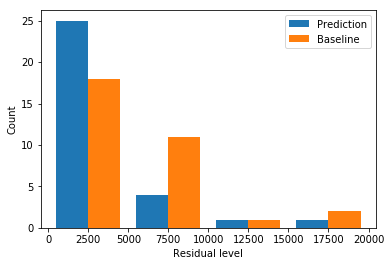

In [35]:
regression_residuals = abs(y_test-y_predict_test )
baseline_residuals = abs(y_test-y_baseline)

plt.hist([regression_residuals,baseline_residuals],label=['Prediction','Baseline'],bins=range(0,25000,5000))
plt.xlabel('Residual level')
plt.ylabel('Count')
plt.legend()
plt.show()

In [39]:


print('Prediction r2 score: {0:.4f}'.format(r2_score(y_test,y_predict_test)))
print('Baseline r2 score: {0:.4f}'.format(r2_score(y_test,y_baseline)))
print()
print('Prediction RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_test))))
print('Baseline RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_baseline))))

Prediction r2 score: 0.1685
Baseline r2 score: -0.0098

Prediction RMSE score: 6153.7039
Baseline RMSE score: 6781.6384


(3) The histogram shows the binning of the different levels of residuals, with low residuals a measure of good performance and high residuals a measure of bad performance. In the graph above you can see that the Prediction model has more lower residuals and fewer high residuals which indicates that it is in general closer to the ground truth. 

The $R^2$ value is a measure of how good the regression fit is compared to the truth data. Defined as $1-\frac{SS_{res}}{SS_{tot}}$ where $SS_{res}$ is simply the squared sum of the residuals and $SS_{tot}$ is the total sum of squares, which is equal to the variance. A good $R^2$ square of 1 will be achieved when $SS_{res}$ is close to zero as this means that there is little difference between the truth and the prediction. Because the baseline just predicts the mean,  $SS_{tot} \approx SS_{res}$ which gives $R^2\approx 0$.

The RMSE measures the square root of the mean of the squared errors. This measure looks at at the squared value of the error between predictions and truth which makes it punative to outliers. It makes sense that our Baseline has a higher RMSE value as the plot in 2.7.1 suggests that there are more values with higher errors than the Prediction. 

Based on the above analysis it seems fair to conclude that on balance the linear model performs better than the baseline model.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) It just means that we are assuming that the testing set isn't biased in any way. There could be repercussions if the testing data were biased as it might give the impression that the model was performing especially well or poorly, but if this performance was on a set of data that was biased then the results would not necessarily be representative of algorithms ability to predict the wider population. 

In [40]:
kf = KFold(n_splits = 5,shuffle = True, random_state=0)

In [42]:
y_pre_split = auto_numeric['price']
   
y_predict_cv = cross_val_predict(lr,X_pre_split,y_pre_split,cv=kf)

print('Cross-validated r2 score: {0:.4f}'.format(r2_score(y_pre_split,y_predict_cv)))
print('Cross-validated RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y_pre_split,y_predict_cv))))

Cross-validated r2 score: 0.1730
Cross-validated RMSE score: 6114.4521


(4) Using 5-fold cross validation we have managed to get a higher $R^2$ score and a lower $MSE$. So the $R^2$ and $RMSE$ values from before came about from a test and training set that were more dissimilar than average. By using cross-validation we have cancelled out some of this variability and have arrived at values that should be more representative of the true performance of the linear model on further data drawn from the same population.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [43]:
auto_base = pd.read_csv('datasets/train_auto_base.csv')

# Firstly we'll split the data (not using cross validation)
X = np.array(auto_base['engine-power']).reshape(-1,1)
y = np.array(auto_base['price']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

# Fit the linear model
lr_base = LinearRegression()
lr_base.fit(X_train,y_train)

# Make a prediction based on the test set
y_predict_base = lr_base.predict(X_test)

print('Base r2 score: {0:.4f}'.format(r2_score(y_test,y_predict_base)))
print('Base RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_base))))

Base r2 score: -0.0154
Base RMSE score: 6800.3315


(159, 2)


,engine-power,price
0,1.0,13950.0
1,1.0,17450.0
2,1.0,17710.0
3,1.0,23875.0
4,1.0,16430.0


,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


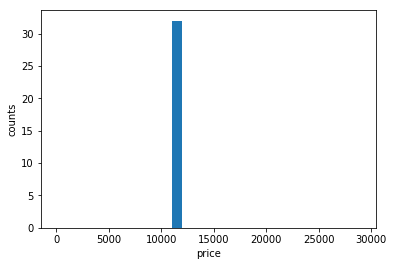

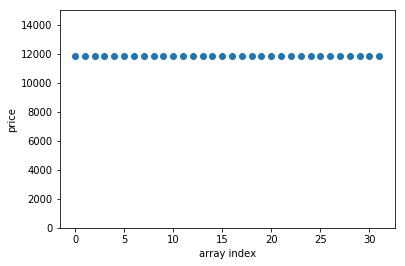

Difference from the mean: 0.00000000


In [51]:
# Let's get a look at this data
print(auto_base.shape)

# Only 2 variables?
display(auto_base.head(5))

# Engine power looks like it's all ones
display(auto_base.describe())

# Yeah it's all ones. So what has that done to the predictions?
# Let's plot them in a histogram
plt.hist(y_predict_base,range(0,30000,1000))
plt.ylabel('counts')
plt.xlabel('price')
plt.show()

# Not much mystery there, it's only plotting one or a very small set of values!
# Let's have a look.
plt.scatter(range(0,len(y_predict_base)),y_predict_base)
plt.xlabel('array index')
plt.ylabel('price')
plt.ylim(0,15000)
plt.show()

# Yeah all the same. Let's see how far these values are from the mean.
print('Difference from the mean: {0:.8f}'.format((np.mean(y_train)-y_predict_base[0])[0]))

# It is the mean!


(2) - Final Conclusion(s)

In this dataset all the independent variables are all 1.0. Because of this the model has no way of learning any information from the dependent variables. If we take $w = (\phi^T \phi)^{-1} \phi^T \bf{y}$ as in the lecture notes we can see that for the case of $\phi_i = 1$ for all $i$, $(\phi^T \phi) = \sum_{i=0}^N \phi_i = N$. Which then gives $w = \frac{1}{N}\bf{y} = \bar{y}$. So for input data of all 1.0 the linear model predicts the mean of the training data. This is why both the baseline on the original data and the linear model on the unitary data have such similar results are they are both predicting the mean, albeit on slightly different datasets. (Baseline computes the mean over all the data not just the training set)   

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [53]:
X = auto_numeric.drop(columns='price')
y = auto_numeric['price']

lr_mv = LinearRegression()
lr_mv.fit(X, y)

y_predict_cross = cross_val_predict(lr_mv, X, y, cv=kf)

print('Multi-variate r2 score: {0:.4f}'.format((r2_score(y,y_predict_cross))))
print('Multia-variate RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y,y_predict_cross))))

Multi-variate r2 score: 0.4861
Multia-variate RMSE score: 4819.8046


(2) Clearly the higher $R^2$ and lower RMSE here indicate that the multi-variate model perfroms better than the univariate one. This is promising as it means that the model is able to use other features of the data to improve its price prediction.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

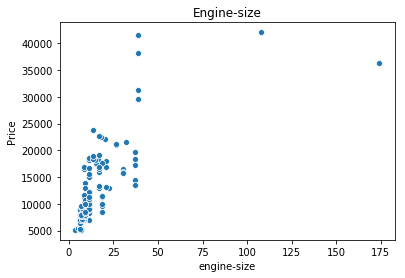

In [55]:
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')
plt.show()

(2) It doesn't look like there is a linear relationship here. There is a positive correlation, but as the engine-size variable increases the price does not go up linearly with it.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

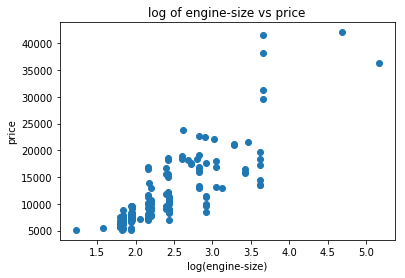

In [56]:
# We can bring bring the variables down to a similar scale by taking logarithms
trans_engine_size = np.log(auto_numeric['engine-size'])

plt.scatter(trans_engine_size, auto_numeric['price'])
plt.xlabel('log(engine-size)')
plt.ylabel('price')
plt.title('log of engine-size vs price')
plt.show()

In [57]:
# Create a new dataset with the transformed engine-size variable
auto_numeric_trans = auto_numeric.copy()
auto_numeric_trans['engine-size'] = trans_engine_size

X = auto_numeric_trans.drop(columns='price')
y = auto_numeric_trans['price']

lr_mv_trans = LinearRegression()
lr_mv_trans.fit(X, y)

y_predict_cross = cross_val_predict(lr_mv_trans, X, y, cv=kf)

print('Transformed Multi-variate r2 score: {0:.4f}'.format(r2_score(y,y_predict_cross)))
print('Transformed Multia-variate RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y,y_predict_cross))))



Transformed Multi-variate r2 score: 0.6896
Transformed Multia-variate RMSE score: 3745.9196


(3) The performance of the model has improved by a fairly large amount with a 42% increase in the $R^2$ score and a 23% reduction in the RMSE. This is likely because there is a strong correlation between price and engine-size, but this was difficult to capture in the linear model. By using the transformed co-ordinates this correlation is better expressed and allows the model to make more powerful predictions.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) All the variables span different orders of magnitude so $\beta_i = 0.5$ for one variable that takes values from 0 to 10 contributes at most 5 to the output. However, for the same $\beta_i$ we might have a variable that ranges from 0 to 1000, contributing at most 500 to the output. Clearly a direct comparsion of these coefficients is not insightful without an idea of the magnitude of their corresponding dependent variable. We could linearly preprocess each attribute to scale it between 0 and 1. This would allow a direct comparison of their coefficients.

In [72]:
# Make a new DataFrame to store the scaled array
auto_numeric_scaled = auto_numeric.copy()


# Scale the array between 0 and 1
auto_numeric_scaled = (auto_numeric_scaled-auto_numeric_scaled.min())/(auto_numeric_scaled.max()-auto_numeric_scaled.min())

X = auto_numeric_scaled.drop(columns='price')
y = auto_numeric_scaled['price']

# Train a new model
lr_mv_scaled = LinearRegression()
lr_mv_scaled.fit(X, y)

# Make a dict to store the coefficients
coeff_dict = {}

# Get the coefficients
for coeff, i in zip(X,range(0,len(X))):
    coeff_dict[coeff] = lr_mv_scaled.coef_[i]
    print(coeff + '-'*(25-len(coeff)) +': {0:.4f}'.format(coeff_dict[coeff]))

    
# Sort the dict
sorted_coeffs = sorted(coeff_dict.items(), key=operator.itemgetter(1))   

# Print the three largest coefficients
print('\nThe largest three coefficients are:')
for i in range(1,4):
    print(sorted_coeffs[-i][0]+': {0:.4f}'.format(sorted_coeffs[-i][1]))



normalized-losses--------: -0.0086
wheel-base---------------: 0.0044
length-------------------: 0.0815
width--------------------: 0.2403
height-------------------: 0.0665
engine-size--------------: 0.9231
bore---------------------: -0.0082
stroke-------------------: -0.0628
compression-ratio--------: 0.1026
engine-power-------------: -0.0266
peak-rpm-----------------: 0.0505
city-mpg-----------------: -0.0294
highway-mpg--------------: -0.2401
mean-effective-pressure--: -0.0553
torque-------------------: 0.0119

The largest three coefficients are:
engine-size: 0.9231
width: 0.2403
compression-ratio: 0.1026


(3) As printed above, the three most important features are engine-size, width and compression-ratio for predicting price under this model.

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) Higher order functions can capture more complexity than lower order ones. For cases where the independent variable has low correlation with the dependent one, we would not want to force a complex relationship as this might lead to overfitting. However, if we know through domain knowledge or prior analysis of a strong correlation between two features, we might want to consider higher order polynomials. Care should be taken not to overfit though, so it's perhaps wise to start with lower order polynomial basis functions, and test higher orders incrementally on the validation set to see if they improve performance.

In [74]:
auto_nonlin = pd.read_csv('datasets/train_auto_nonlinear.csv')

nonlin_length = auto_nonlin['length']**2
nonlin_engine_power = auto_nonlin['engine-power']**2

auto_nonlin['length'] = nonlin_length
auto_nonlin['engine-power'] = nonlin_engine_power

X = auto_nonlin.drop(columns='price')
y = auto_nonlin['price']

lr_mv_nonlin = LinearRegression()
lr_mv_nonlin.fit(X, y)

y_predict_cross = cross_val_predict(lr_mv_nonlin, X, y, cv=kf)

print('Transformed Multi-variate r2 score: {0:.4f}'.format(r2_score(y,y_predict_cross)))
print('Transformed Multia-variate RMSE score: {0:.4f}'.format(np.sqrt(mean_squared_error(y,y_predict_cross))))


Transformed Multi-variate r2 score: 0.6870
Transformed Multia-variate RMSE score: 3761.3918


(3) Making these changes has resulted in slightly worse performance than in Question 3.3. As I mentioned in my previous answer, adding polynomial order to variables that do not have a large correlation with the dependent variable can lead to overfitting and thus worse performance. We were able to find a compelling reason to model a particularly important variable with a power law then we might see an improvement in performance.